In [3]:
import tweepy
import pandas as pd 
import json
from datetime import datetime
import s3fs 

In [4]:
access_key = "phE0JeL2pm7ORaYErUFWvVWDg" 
access_secret = "Pf0bUZHRhrpq7eBW9qlITRsAfVJT4HOnoRNcECHsqcjXZDIyL0" 
consumer_key = "971060216820260864-63bcNdiWhh1k6BIzm3Rwj24E8XbFtPO"
consumer_secret = "uBLNH2DAYCT5DrEdInZZg8jA2bIlf2e9XfV0ce3vMDQnN"


# Twitter authentication and connecting to twitter API
auth = tweepy.OAuthHandler(access_key, access_secret)   
auth.set_access_token(consumer_key, consumer_secret)

# Creating an API object 
api = tweepy.API(auth)


In [5]:
tweets = api.user_timeline(screen_name='@IITKanpur', 
                            count=1000,
                            include_rts = False,
                            tweet_mode = 'extended'
                            )

# 200 is the maximum allowed count so can't do anything about it.
# Extended tweet mode is necessary to keep full text else only first 140 words are extracted

In [ ]:
# to check if connection with twitter api is made correctly
print(tweets)

In [6]:
tweet_list = []
for tweet in tweets:
    text = tweet._json["full_text"]

    refined_tweet = {"user": tweet.user.screen_name,
                    'text' : text,
                    'favorite_count' : tweet.favorite_count,
                    'retweet_count' : tweet.retweet_count,
                    'created_at' : tweet.created_at}
        
    tweet_list.append(refined_tweet)

In [7]:
df = pd.DataFrame(tweet_list)

In [8]:
df.to_csv('iitk_twitter_data.csv')

In [ ]:
# to check if data frame is made
print(df)

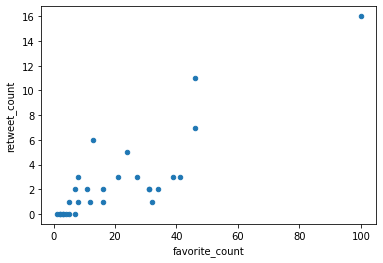

In [10]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count')
plt.show()

<AxesSubplot:ylabel='Frequency'>

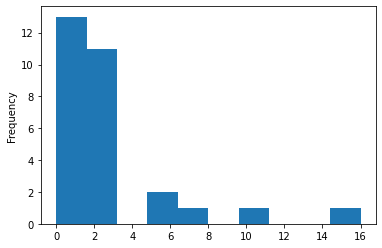

In [15]:
df["retweet_count"].plot(kind = 'hist', y = 'favorite_count')